In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('../DATA/Airbnb_Open_Data.csv', low_memory=False)

In [4]:
data

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [34]:
data["price"] = data["price"].replace("$","D ").replace('$','D',method="bfill")

In [35]:
data["price"].to_numpy()

array(['$966', '$142', '$620', ..., '$988 ', '$546 ', '$1,032 '],
      dtype=object)

In [43]:
def remove_dollar_sign(col):
    for i in range(len(col)):
        print(col[i])
        col[i]= col[i].replace("$","").replace('$','')
    return col

In [44]:
remove_dollar_sign(data["price"])

966
142
620
368
204
577
71
1,060
1,018
291
319
606
714
580
149
578
778
656
460
1,095
281
477
133
1,050
816
1,175
530
274
209
432
666
770
512
858
545
191
1,111
203
1,097
1,020
1,010
563
370
687
856
62
435
916
459
363
212
728
901
335
254
903
439
1,024
658
543
256
294
779
653
303
825
646
1,037
87
316
735
524
238
603
571
398
618
116
54
744
1,065
1,057
1,056
909
586
575
292
194
123
1,079
266
728
583
51
588
360
380
343
160
528
739
913
507
306
1,078
887
243
500
589
839
528
66
761
523
631
677
574
232
1,154
737
456
291
996
788
1,105
1,109
659
571
736
946
449
930
329
1,125
1,099
256
263
96
1,192
593
490
488
658
1,109
606
853
172
nan


/tmp/ipykernel_95262/3013527997.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[i]= col[i].replace("$","").replace('$','')


AttributeError: 'float' object has no attribute 'replace'

In [46]:
data.price

0             966
1             142
2             620
3             368
4             204
           ...   
102594      $844 
102595      $837 
102596      $988 
102597      $546 
102598    $1,032 
Name: price, Length: 102599, dtype: object

In [47]:
def remove_dollar_sign(col):
    for i in range(len(col)):
        if type(col[i])==float :
            print(col[i])
        col[i]= col[i].replace(" ","").replace("$","").replace(",","")
    return col

In [48]:
data.price

0             966
1             142
2             620
3             368
4             204
           ...   
102594      $844 
102595      $837 
102596      $988 
102597      $546 
102598    $1,032 
Name: price, Length: 102599, dtype: object

In [49]:
data = data.drop(columns={'license', 'house_rules'})


In [50]:
data = data.drop(columns={'country', 'country code', 'id', 'host id'})

In [51]:
data

,NAME,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
0,Clean & quiet apt home by the park,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0
1,Skylit Midtown Castle,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0
2,THE VILLAGE OF HARLEM....NEW YORK !,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0
3,NaN,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,368,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0
4,Entire Apt: Spacious Studio/Loft by central park,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,Spare room in Williamsburg,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,False,flexible,Private room,2003.0,$844,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0
102595,Best Location near Columbia U,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,True,moderate,Private room,2016.0,$837,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0
102596,"Comfy, bright room in Brooklyn",unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,True,moderate,Private room,2009.0,$988,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0
102597,Big Studio-One Stop from Midtown,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,True,strict,Entire home/apt,2015.0,$546,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0


In [52]:
data.nunique()

NAME                              61281
host_identity_verified                2
host name                         13190
neighbourhood group                   7
neighbourhood                       224
lat                               21991
long                              17774
instant_bookable                      2
cancellation_policy                   3
room type                             4
Construction year                    20
price                              1290
service fee                         231
minimum nights                      153
number of reviews                   476
last review                        2477
reviews per month                  1016
review rate number                    5
calculated host listings count       78
availability 365                    438
dtype: int64

In [53]:
data.isnull().sum()/data.shape[0] * 100

NAME                               0.243667
host_identity_verified             0.281679
host name                          0.395715
neighbourhood group                0.028265
neighbourhood                      0.015595
lat                                0.007797
long                               0.007797
instant_bookable                   0.102340
cancellation_policy                0.074075
room type                          0.000000
Construction year                  0.208579
price                              0.240743
service fee                        0.266084
minimum nights                     0.398639
number of reviews                  0.178364
last review                       15.490404
reviews per month                 15.476759
review rate number                 0.317742
calculated host listings count     0.310919
availability 365                   0.436651
dtype: float64

In [54]:
data.isnull().sum()

NAME                                250
host_identity_verified              289
host name                           406
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64

In [55]:
data.loc[data['neighbourhood group'] == 'manhatan', 'neighbourhood group'] = 'Manhattan'
data.loc[data['neighbourhood group'] == 'brookln', 'neighbourhood group' ] = 'Brooklyn'

In [56]:
data['NAME'] = data[['NAME']].fillna('?')
data['host name'] = data[['host name']].fillna('?')
data['neighbourhood group'] = data[['neighbourhood group']].fillna('Manhattan')

In [57]:
def remove_dollar_sign(col):
    for i in range (len(col)):
        if type(col[i])==str:
            col[i]=col[i].replace('$','').replace(' ','').replace(',','')

In [58]:
remove_dollar_sign(data["price"])


/tmp/ipykernel_95262/1311748337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  col[i]=col[i].replace('$','').replace(' ','').replace(',','')


In [59]:
data["price"]

0          966
1          142
2          620
3          368
4          204
          ... 
102594     844
102595     837
102596     988
102597     546
102598    1032
Name: price, Length: 102599, dtype: object

In [60]:
data.duplicated().sum()

3615

In [61]:
data.shape

(102599, 20)

<AxesSubplot: xlabel='neighbourhood', ylabel='count'>

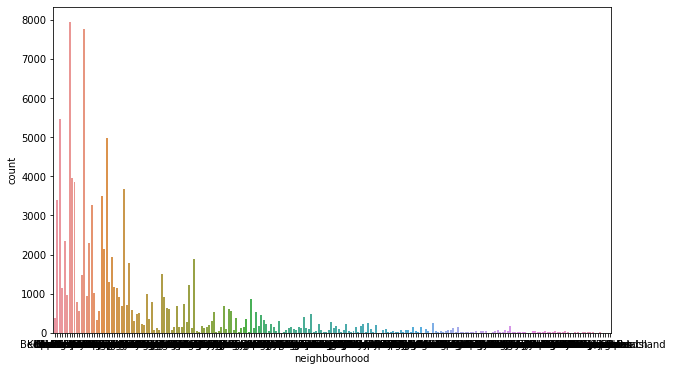

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood', data=data)

In [63]:
plt.figure(figsize=(10, 6))
sns.countplot(x='neighbourhood group', data=data[])

SyntaxError: invalid syntax. Perhaps you forgot a comma? (285055597.py, line 2)

<AxesSubplot:xlabel='host_identity_verified', ylabel='count'>

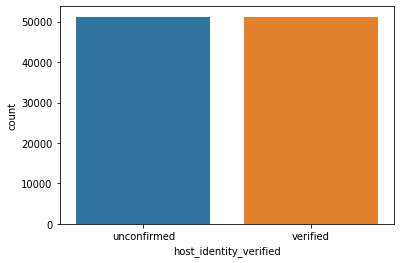

In [ ]:
sns.countplot(x='host_identity_verified', data=data)

In [64]:
from  sklearn.preprocessing import StandardScaler

In [65]:
ss = StandardScaler(with_mean=False , with_std=True )

temp = pd.DataFrame(ss.fit_transform(data[["price","services","services fee", "lat"]])) 
temp.describe()

KeyError: "['services', 'services fee'] not in index"

In [ ]:
from sklearn.preprocessing import minmax_scale